In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%ls

drive/  sample_data/


In [3]:
!git clone https://github.com/bdura/attentive-eligibility.git

Cloning into 'attentive-eligibility'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 777 (delta 12), reused 21 (delta 10), pack-reused 750
Receiving objects: 100% (777/777), 5.18 MiB | 23.24 MiB/s, done.
Resolving deltas: 100% (503/503), done.


In [4]:
%cd attentive-eligibility/

/content/attentive-eligibility


In [5]:
import os
import sys
sys.path.append(os.path.abspath('../'))

!git pull
!git status

Already up to date.
On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean


In [0]:
import gym
import numpy as np
import time
import torch
import matplotlib.pyplot as plt
import copy

import models.rnn as rnns
import models.mlp as mlps
import models.linear as linears
import control.agents as agents
import control.environments as env
import utils.eligibility_optim as eligibility

In [0]:
env_name = 'Taxi-v2'

environment = env.Environment(
    environment=gym.make(env_name), 
    agent=None,
    verbose=True,
    max_steps=200,
    capacity=500,
    representation_method='one_hot_encoding',
)

In [0]:
model_rnn = rnns.RNN(
    input_dimension=environment.get_input_dimension(), 
    hidden_dimension=50,
    n_actions=environment.n_actions,
    dropout=0.,
    truncate=10
)

In [9]:
model = model_rnn

agent = agents.DQNAgent(
    model=model,
    optimiser=torch.optim.Adam(model.parameters(), lr=3e-4), 
    gamma=.99, 
    temperature=3, 
    algorithm='qlearning', 
    n_actions=environment.n_actions,
)

environment.agent = agent
print(agent.device)

cuda


In [0]:
environment.agent.save('../drive/My Drive/Colab Notebooks/saved/final/taxi_rnn')

In [0]:
model.load_state_dict(torch.load('../drive/My Drive/Colab Notebooks/saved/final/taxi_rnn/state_dict.pth'))
agent.commit()

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Epoch 1/100


100%|###############################################################| 10/10 [00:19<00:00,  2.60s/it]


>> Training return : -730.02


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -204.05, steps : 200.00
>> Training loss : 30.08
Epoch 2/100


100%|###############################################################| 10/10 [00:44<00:00,  4.96s/it]


>> Training return : -262.73


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.90, steps : 200.00
>> Training loss : 7.01
Epoch 3/100


100%|###############################################################| 10/10 [01:10<00:00,  7.53s/it]


>> Training return : -254.27


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.00, steps : 200.00
>> Training loss : 5.24
Epoch 4/100


100%|###############################################################| 10/10 [01:16<00:00,  6.94s/it]


>> Training return : -241.70


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.00, steps : 200.00
>> Training loss : 3.47
Epoch 5/100


100%|###############################################################| 10/10 [01:20<00:00,  8.62s/it]


>> Training return : -250.31


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.00, steps : 200.00
>> Training loss : 2.06
Epoch 6/100


100%|###############################################################| 10/10 [02:36<00:00, 15.64s/it]


>> Training return : -246.26


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.90, steps : 200.00
>> Training loss : 1.72
Epoch 7/100


100%|###############################################################| 10/10 [02:39<00:00, 16.03s/it]


>> Training return : -244.01


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.00, steps : 200.00
>> Training loss : 1.50
Epoch 8/100


100%|###############################################################| 10/10 [02:40<00:00, 15.76s/it]


>> Training return : -248.42


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -201.35, steps : 200.00
>> Training loss : 1.60
Epoch 9/100


100%|###############################################################| 10/10 [06:39<00:00, 69.82s/it]


>> Training return : -244.91


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.45, steps : 200.00
>> Training loss : 1.23
Epoch 10/100


100%|###############################################################| 10/10 [05:36<00:00, 20.72s/it]


>> Training return : -237.69
>> Evaluation return : -200.00, steps : 200.00
>> Training loss : 0.91


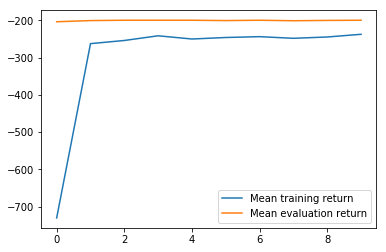

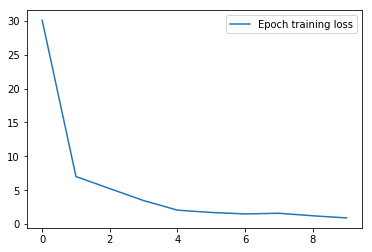

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Epoch 11/100


100%|###############################################################| 10/10 [02:11<00:00, 13.07s/it]


>> Training return : -232.64


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.90, steps : 200.00
>> Training loss : 0.85
Epoch 12/100


100%|###############################################################| 10/10 [01:12<00:00,  6.72s/it]


>> Training return : -229.44


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.45, steps : 200.00
>> Training loss : 0.57
Epoch 13/100


100%|###############################################################| 10/10 [01:05<00:00,  6.52s/it]


>> Training return : -225.68


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.00, steps : 200.00
>> Training loss : 0.90
Epoch 14/100


100%|###############################################################| 10/10 [01:06<00:00,  6.80s/it]


>> Training return : -234.33


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.00, steps : 200.00
>> Training loss : 0.83
Epoch 15/100


100%|###############################################################| 10/10 [01:06<00:00,  6.68s/it]


>> Training return : -224.80


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.00, steps : 200.00
>> Training loss : 0.70
Epoch 16/100


100%|###############################################################| 10/10 [01:02<00:00,  6.53s/it]


>> Training return : -221.45


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.45, steps : 200.00
>> Training loss : 0.48
Epoch 17/100


100%|###############################################################| 10/10 [01:07<00:00,  7.26s/it]


>> Training return : -224.72


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.90, steps : 200.00
>> Training loss : 0.71
Epoch 18/100


100%|###############################################################| 10/10 [00:52<00:00,  4.69s/it]


>> Training return : -220.59


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.00, steps : 200.00
>> Training loss : 0.68
Epoch 19/100


100%|###############################################################| 10/10 [00:47<00:00,  4.63s/it]


>> Training return : -230.91


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.00, steps : 200.00
>> Training loss : 0.47
Epoch 20/100


100%|###############################################################| 10/10 [00:36<00:00,  3.40s/it]


>> Training return : -227.75
>> Evaluation return : -200.00, steps : 200.00
>> Training loss : 0.52


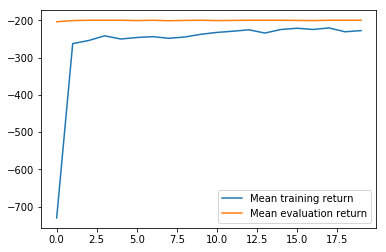

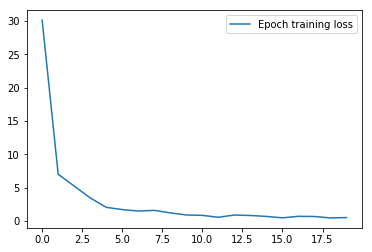

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Epoch 21/100


100%|###############################################################| 10/10 [00:33<00:00,  3.40s/it]


>> Training return : -225.23


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.90, steps : 200.00
>> Training loss : 0.94
Epoch 22/100


100%|###############################################################| 10/10 [00:44<00:00,  4.49s/it]


>> Training return : -224.40


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.45, steps : 200.00
>> Training loss : 1.25
Epoch 23/100


100%|###############################################################| 10/10 [00:55<00:00,  5.66s/it]


>> Training return : -213.26


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.90, steps : 200.00
>> Training loss : 1.54
Epoch 24/100


100%|###############################################################| 10/10 [00:58<00:00,  5.74s/it]


>> Training return : -234.40


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.90, steps : 200.00
>> Training loss : 1.37
Epoch 25/100


100%|###############################################################| 10/10 [00:59<00:00,  5.97s/it]


>> Training return : -239.65


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.45, steps : 200.00
>> Training loss : 1.34
Epoch 26/100


100%|###############################################################| 10/10 [00:57<00:00,  5.61s/it]


>> Training return : -239.33


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.00, steps : 200.00
>> Training loss : 1.09
Epoch 27/100


100%|###############################################################| 10/10 [01:09<00:00,  7.47s/it]


>> Training return : -236.11


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.00, steps : 200.00
>> Training loss : 1.00
Epoch 28/100


100%|###############################################################| 10/10 [01:20<00:00,  8.23s/it]


>> Training return : -243.45


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.90, steps : 200.00
>> Training loss : 0.89
Epoch 29/100


100%|###############################################################| 10/10 [01:21<00:00,  8.14s/it]


>> Training return : -237.74


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.45, steps : 200.00
>> Training loss : 0.97
Epoch 30/100


100%|###############################################################| 10/10 [01:17<00:00,  7.75s/it]


>> Training return : -233.12
>> Evaluation return : -200.00, steps : 200.00
>> Training loss : 0.68


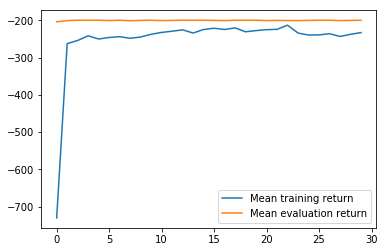

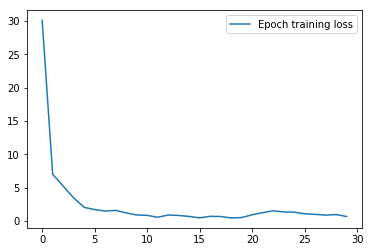

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Epoch 31/100


100%|###############################################################| 10/10 [01:10<00:00,  7.03s/it]


>> Training return : -212.63


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.45, steps : 200.00
>> Training loss : 0.73
Epoch 32/100


100%|###############################################################| 10/10 [01:10<00:00,  7.18s/it]


>> Training return : -226.63


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.00, steps : 200.00
>> Training loss : 0.69
Epoch 33/100


100%|###############################################################| 10/10 [01:13<00:00,  7.30s/it]


>> Training return : -220.05


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.00, steps : 200.00
>> Training loss : 0.58
Epoch 34/100


100%|###############################################################| 10/10 [01:13<00:00,  7.21s/it]


>> Training return : -236.05


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.45, steps : 200.00
>> Training loss : 0.84
Epoch 35/100


100%|###############################################################| 10/10 [01:12<00:00,  7.33s/it]


>> Training return : -227.77


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.00, steps : 200.00
>> Training loss : 0.39
Epoch 36/100


100%|###############################################################| 10/10 [01:21<00:00,  8.62s/it]


>> Training return : -229.00


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.45, steps : 200.00
>> Training loss : 1.66
Epoch 37/100


100%|###############################################################| 10/10 [01:25<00:00,  8.35s/it]


>> Training return : -224.90


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.00, steps : 200.00
>> Training loss : 4.19
Epoch 38/100


100%|###############################################################| 10/10 [01:16<00:00,  8.15s/it]


>> Training return : -221.75


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.45, steps : 200.00
>> Training loss : 0.60
Epoch 39/100


100%|###############################################################| 10/10 [01:20<00:00,  8.16s/it]


>> Training return : -225.25


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.45, steps : 200.00
>> Training loss : 0.54
Epoch 40/100


100%|###############################################################| 10/10 [01:12<00:00,  6.85s/it]


>> Training return : -218.63
>> Evaluation return : -200.45, steps : 200.00
>> Training loss : 0.62


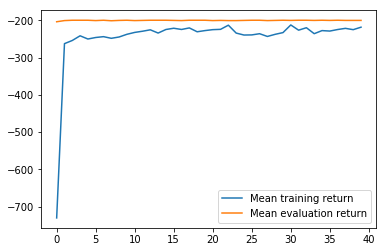

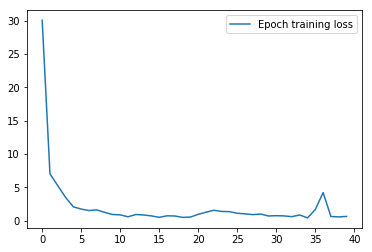

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Epoch 41/100


100%|###############################################################| 10/10 [01:02<00:00,  6.42s/it]


>> Training return : -227.28


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.00, steps : 200.00
>> Training loss : 0.44
Epoch 42/100


100%|###############################################################| 10/10 [01:04<00:00,  6.43s/it]


>> Training return : -235.73


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.00, steps : 200.00
>> Training loss : 0.28
Epoch 43/100


100%|###############################################################| 10/10 [01:02<00:00,  6.13s/it]


>> Training return : -204.65


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -138.10, steps : 143.95
>> Training loss : 0.31
Epoch 44/100


100%|###############################################################| 10/10 [01:04<00:00,  6.34s/it]


>> Training return : -223.34


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -169.15, steps : 172.30
>> Training loss : 0.21
Epoch 45/100


100%|###############################################################| 10/10 [01:04<00:00,  6.39s/it]


>> Training return : -233.65


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -138.40, steps : 144.70
>> Training loss : 0.17
Epoch 46/100


100%|###############################################################| 10/10 [01:06<00:00,  6.84s/it]


>> Training return : -216.14


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -138.80, steps : 144.65
>> Training loss : 0.14
Epoch 47/100


100%|###############################################################| 10/10 [01:05<00:00,  6.71s/it]


>> Training return : -218.34


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -158.50, steps : 162.70
>> Training loss : 0.10
Epoch 48/100


100%|###############################################################| 10/10 [01:03<00:00,  6.38s/it]


>> Training return : -226.50


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -138.35, steps : 144.20
>> Training loss : 0.10
Epoch 49/100


100%|###############################################################| 10/10 [01:03<00:00,  6.08s/it]


>> Training return : -218.94


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -159.05, steps : 162.80
>> Training loss : 0.08
Epoch 50/100


100%|###############################################################| 10/10 [00:54<00:00,  5.35s/it]


>> Training return : -208.21
>> Evaluation return : -128.40, steps : 135.30
>> Training loss : 0.10


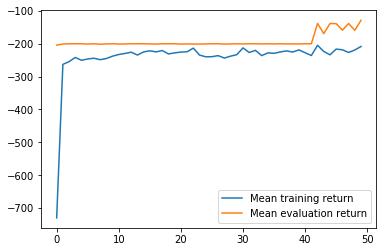

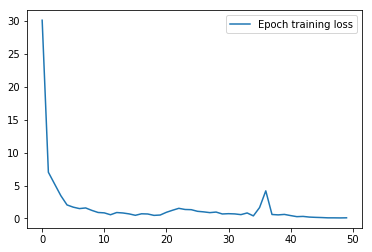

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Epoch 51/100


100%|###############################################################| 10/10 [00:49<00:00,  4.85s/it]


>> Training return : -196.58


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -158.85, steps : 163.05
>> Training loss : 0.10
Epoch 52/100


100%|###############################################################| 10/10 [00:47<00:00,  4.49s/it]


>> Training return : -202.45


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -158.80, steps : 163.00
>> Training loss : 0.09
Epoch 53/100


100%|###############################################################| 10/10 [00:48<00:00,  5.08s/it]


>> Training return : -205.73


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.00, steps : 200.00
>> Training loss : 0.08
Epoch 54/100


100%|###############################################################| 10/10 [00:50<00:00,  5.12s/it]


>> Training return : -208.99


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.00, steps : 200.00
>> Training loss : 0.05
Epoch 55/100


100%|###############################################################| 10/10 [00:48<00:00,  4.84s/it]


>> Training return : -212.54


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.00, steps : 200.00
>> Training loss : 0.05
Epoch 56/100


100%|###############################################################| 10/10 [00:54<00:00,  5.48s/it]


>> Training return : -216.04


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.00, steps : 200.00
>> Training loss : 0.09
Epoch 57/100


100%|###############################################################| 10/10 [00:57<00:00,  5.77s/it]


>> Training return : -215.83


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.45, steps : 200.00
>> Training loss : 0.05
Epoch 58/100


100%|###############################################################| 10/10 [00:41<00:00,  4.11s/it]


>> Training return : -217.37


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -148.10, steps : 153.35
>> Training loss : 0.05
Epoch 59/100


100%|###############################################################| 10/10 [00:55<00:00,  5.48s/it]


>> Training return : -205.69


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -97.75, steps : 107.80
>> Training loss : 0.05
Epoch 60/100


100%|###############################################################| 10/10 [00:59<00:00,  5.90s/it]


>> Training return : -212.57
>> Evaluation return : -106.75, steps : 115.75
>> Training loss : 0.06


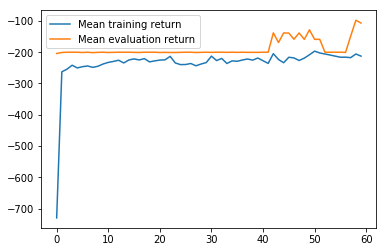

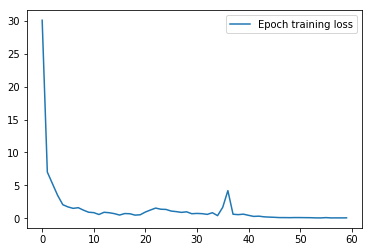

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Epoch 61/100


100%|###############################################################| 10/10 [01:03<00:00,  6.87s/it]


>> Training return : -215.10


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -128.55, steps : 135.45
>> Training loss : 2.57
Epoch 62/100


100%|###############################################################| 10/10 [01:10<00:00,  7.30s/it]


>> Training return : -209.89


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -158.55, steps : 162.75
>> Training loss : 3.30
Epoch 63/100


100%|###############################################################| 10/10 [01:07<00:00,  6.70s/it]


>> Training return : -204.56


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -158.50, steps : 162.70
>> Training loss : 2.36
Epoch 64/100


100%|###############################################################| 10/10 [01:07<00:00,  6.72s/it]


>> Training return : -197.65


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -86.60, steps : 98.15
>> Training loss : 1.18
Epoch 65/100


100%|###############################################################| 10/10 [00:42<00:00,  3.87s/it]


>> Training return : -173.48


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -106.60, steps : 116.05
>> Training loss : 0.88
Epoch 66/100


100%|###############################################################| 10/10 [00:37<00:00,  3.75s/it]


>> Training return : -158.06


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -66.20, steps : 79.85
>> Training loss : 0.77
Epoch 67/100


100%|###############################################################| 10/10 [00:38<00:00,  3.73s/it]


>> Training return : -164.14


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -148.25, steps : 153.50
>> Training loss : 0.65
Epoch 68/100


100%|###############################################################| 10/10 [00:29<00:00,  2.69s/it]


>> Training return : -143.45


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -158.60, steps : 162.80
>> Training loss : 0.84
Epoch 69/100


100%|###############################################################| 10/10 [00:29<00:00,  2.95s/it]


>> Training return : -171.37


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -168.95, steps : 172.10
>> Training loss : 0.82
Epoch 70/100


100%|###############################################################| 10/10 [00:28<00:00,  2.83s/it]


>> Training return : -177.59
>> Evaluation return : -190.45, steps : 190.60
>> Training loss : 0.86


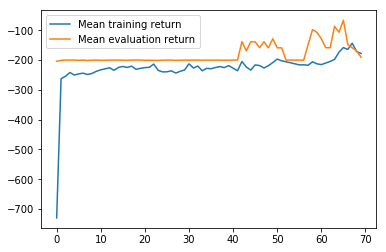

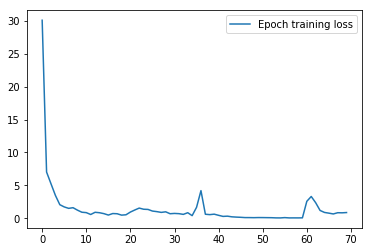

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Epoch 71/100


100%|###############################################################| 10/10 [00:29<00:00,  2.99s/it]


>> Training return : -185.46


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.00, steps : 200.00
>> Training loss : 0.78
Epoch 72/100


100%|###############################################################| 10/10 [00:29<00:00,  2.95s/it]


>> Training return : -184.28


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -200.00, steps : 200.00
>> Training loss : 1.10
Epoch 73/100


100%|###############################################################| 10/10 [00:37<00:00,  3.92s/it]


>> Training return : -183.28


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -117.50, steps : 125.45
>> Training loss : 1.05
Epoch 74/100


100%|###############################################################| 10/10 [00:41<00:00,  4.06s/it]


>> Training return : -177.81


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -106.40, steps : 115.85
>> Training loss : 0.64
Epoch 75/100


100%|###############################################################| 10/10 [00:29<00:00,  2.89s/it]


>> Training return : -164.58


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -106.15, steps : 115.60
>> Training loss : 0.73
Epoch 76/100


100%|###############################################################| 10/10 [00:29<00:00,  2.97s/it]


>> Training return : -176.91


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -138.15, steps : 144.45
>> Training loss : 0.58
Epoch 77/100


100%|###############################################################| 10/10 [00:27<00:00,  2.86s/it]


>> Training return : -170.44


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -75.60, steps : 88.20
>> Training loss : 0.31
Epoch 78/100


100%|###############################################################| 10/10 [00:31<00:00,  3.18s/it]


>> Training return : -545.57


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -503.40, steps : 172.20
>> Training loss : 0.71
Epoch 79/100


100%|###############################################################| 10/10 [00:27<00:00,  2.75s/it]


>> Training return : -677.76


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -1383.50, steps : 200.00
>> Training loss : 3.03
Epoch 80/100


 10%|######4                                                         | 1/10 [00:02<00:24,  2.74s/it]/content/attentive-eligibility/control/utils.py:31: RuntimeWarning: invalid value encountered in subtract
  z = x - x.max(axis=axis, keepdims=True)



ValueError: ignored

In [11]:
training, evaluation = environment.run(
    epochs=100,
    segments=10,
    episodes=10,
    wall_time=10,
    num_evaluation=20,
    batch_size=100,
    save_directory='../drive/My Drive/Colab Notebooks/saved/final/taxi_rnn',
    temp_decay = 1.,
    display_return_curve=True,
)